In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2343912425577,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,2343912425577,34,Urban
4,South Jack,2019-03-06 4:28,34.58,2343912425577,46,Urban


In [4]:
# DataFrames for each city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [5]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = sum_fares_by_type / total_ride_count 
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = sum_fares_by_type / total_driver_count
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
      {"Total Rides": total_ride_count, 
      "Total Drivers": total_driver_count, 
      "Total Fares": sum_fares_by_type, 
      "Average Fare per Ride": average_fare_per_ride, 
      "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [13]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
weekly_city_fares_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
weekly_city_fares_df

type   date            
Rural  2019-01-01 9:45     43.69
       2019-01-02 11:18    52.12
       2019-01-03 19:51    19.90
       2019-01-04 3:31     24.88
       2019-01-06 7:38     47.33
                           ...  
Urban  2019-05-08 1:54     32.69
       2019-05-08 2:31     41.33
       2019-05-08 4:20     21.99
       2019-05-08 4:39     18.45
       2019-05-08 7:29     18.55
Name: fare, Length: 2364, dtype: float64

In [14]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
weekly_city_fares_df = weekly_city_fares_df.reset_index()
weekly_city_fares_df

,type,date,fare
0,Rural,2019-01-01 9:45,43.69
1,Rural,2019-01-02 11:18,52.12
2,Rural,2019-01-03 19:51,19.90
3,Rural,2019-01-04 3:31,24.88
4,Rural,2019-01-06 7:38,47.33
...,...,...,...
2359,Urban,2019-05-08 1:54,32.69
2360,Urban,2019-05-08 2:31,41.33
2361,Urban,2019-05-08 4:20,21.99
2362,Urban,2019-05-08 4:39,18.45


In [15]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
weekly_city_fares_df = weekly_city_fares_df.pivot(index="date", columns="type", values="fare")
weekly_city_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54,NaN,NaN,32.69
2019-05-08 2:31,NaN,NaN,41.33
2019-05-08 4:20,NaN,NaN,21.99


In [16]:
weekly_city_fares_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31


In [17]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range_df = weekly_city_fares_df.loc['2019-01-01':'2019-04-29']
date_range_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34,NaN,NaN,40.46
2019-04-28 8:15,NaN,NaN,22.86
2019-04-28 9:03,NaN,NaN,15.00


In [18]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_range_df.index = pd.to_datetime(date_range_df.index)

In [19]:
# 6. Check that the datatype for the index is datetime using df.info()
date_range_df.info("date")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [20]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_sum_df = date_range_df.resample('W').sum()
weekly_fares_sum_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


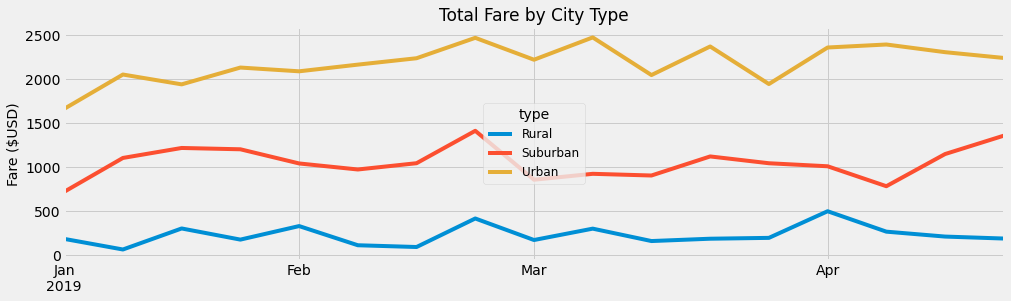

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax = weekly_fares_sum_df.plot(figsize=(15, 4))

ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel('')
ax.set_title('Total Fare by City Type',fontsize=17)

lgnd = ax.legend(loc="center", title="type", fontsize="12")

# Save Figure
plt.savefig("Resources/PyBer_fare_summary.png")
